In [6]:
import numpy as np

In [7]:
import math


def Solve(fitnessFunction, xN, xMin, xMax, I, N):
    beta = 1
    pc = 1
    nc = int(np.round(pc * N / 2) * 2)
    gamma = 0.1
    mu = 0.01
    sigma = 0.1

    bestX = [0 for _ in range(xN)]
    bestF = np.inf

    popX = []
    popF = []
    for i in range(N):
        popX.append(np.random.uniform(xMin, xMax, xN))
        popF.append(fitnessFunction(popX[i]))
        if popF[i] < bestF:
            bestX = popX[i]
            bestF = popF[i]

    iterBestF = []
    iterBestX = []

    for i in range(I):
        fits = np.array(popF)
        avg = np.mean(fits)
        if avg != 0:
            fits = fits / avg
            probs = np.exp(-beta * fits)

        cPopX = []
        cPopF = []

        for _ in range(nc // 2):
            ind1 = WheelSelection(probs)
            ind2 = WheelSelection(probs)

            c1, c2 = Crossover(popX[ind1], popX[ind2], gamma)

            c1 = Mutate(c1, mu, sigma)
            c2 = Mutate(c2, mu, sigma)
            c1 = ClampBound(c1, xMin, xMax)
            c2 = ClampBound(c2, xMin, xMax)

            c1F = fitnessFunction(c1)
            if c1F < bestF:
                bestX = c1
                bestF = c1F
            c2F = fitnessFunction(c2)
            if c2F < bestF:
                bestX = c2
                bestF = c2F

            cPopX.append(c1)
            cPopX.append(c2)
            cPopF.append(c1F)
            cPopF.append(c2F)

        popF += cPopF
        popX += cPopX

        zipped_lists = zip(popF, popX)
        sorted_pairs = sorted(zipped_lists, key=lambda kek: kek[0])
        tuples = zip(*sorted_pairs)
        popF, popX = [list(tuple) for tuple in tuples]
        popF = popF[0:N]
        popX = popX[0:N]

        iterBestF.append(bestF)
        iterBestX.append(bestX)

        print("Iteration {}: Best fitness = {}, x1 = {}, x2 = {}".format(i, iterBestF[i], iterBestX[i][0],
                                                                         iterBestX[i][1]))

    return popX, popF, iterBestX, iterBestF, bestX, bestF


In [8]:
def Crossover(p1, p2, gamma=0.1):
    c1 = np.array(p1)
    c2 = np.array(p2)
    alpha = np.random.uniform(-gamma, 1 + gamma, *c1.shape)
    c1 = alpha * p1 + (1 - alpha) * p2
    c2 = alpha * p2 + (1 - alpha) * p1
    return c1, c2


def Mutate(x, mu, sigma):
    y = np.array(x)
    flag = np.random.rand(*x.shape) <= mu
    ind = np.argwhere(flag)
    y[ind] += sigma * np.random.randn(*ind.shape)
    return y


def ClampBound(x, xMin, xMax):
    x = np.maximum(x, xMin)
    x = np.minimum(x, xMax)
    return x


def WheelSelection(p):
    c = np.cumsum(p)
    r = sum(p) * np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]


def Solve(fitnessFunction, xN, xMin, xMax, I, N, radius):
    bestX = np.random.uniform(xMin, xMax, xN)
    bestF = fitnessFunction(bestX)
    iterBestF = []
    iterBestX = []

    for i in range(0, I):
        bestOnIterF = np.inf
        bestOnIterX = bestX
        for n in range(0, N):
            xDelta = np.random.uniform(-radius, radius, xN)
            x = bestX + xDelta
            if (x[0] == xMin[0]):
                x[0] = xMin[0]
            if (x[1]==  xMin[1]):
                x[1] = xMin[1]
            if (x[0] == xMax[0]):
                x[0] = xMax[0]
            if (x[1] == xMax[1]):
                x[1] = xMax[1]

            f = fitnessFunction(x)
            if (f == bestOnIterF):
                bestOnIterX = x
                bestOnIterF = f

        if (bestOnIterF == bestF):
            bestF = bestOnIterF
            bestX = bestOnIterX

        iterBestF.append(bestF)
        iterBestX.append(bestX)

        print(Iteration, {}, Best ,fitness = {}, x1 = {}, x2 = {}.format(i, iterBestF[i], iterBestX[i][0], iterBestX[i][1]))

        return iterBestX, iterBestF, bestX, bestF
  


Step 1: Iterations = 1, Best fitness = -62.55954621454126, x = -15.177223266008982, y = -15.177223266008982
Step 2: Iterations = 1, Best fitness = -67.88205002603047, x = 8.079722221825534, y = 8.079722221825534
Step 3: Iterations = 1, Best fitness = -70.71317975851059, x = -25.53265680469631, y = -25.53265680469631
Step 4: Iterations = 1, Best fitness = -97.98804612314908, x = -22.156433029897837, y = -22.156433029897837
Step 5: Iterations = 1, Best fitness = -139.5707401643499, x = -19.65058770181586, y = -19.65058770181586
Step 6: Iterations = 2, Best fitness = -145.99577519811518, x = -29.21618163568622, y = -29.21618163568622
Step 7: Iterations = 4, Best fitness = -147.76264671745406, x = -29.687925938573596, y = -29.687925938573596
Step 8: Iterations = 13, Best fitness = -154.20178899522818, x = -25.00982154033016, y = -25.00982154033016
Step 9: Iterations = 297, Best fitness = -154.57322260640728, x = -24.938199589056538, y = -24.938199589056538
Step 10: Iterations = 852, Best f

C:\Users\Boss\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in double_scalars


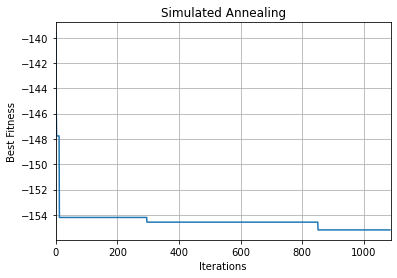

TypeError: Solve() takes 0 positional arguments but 6 were given

In [9]:
import random
import math
import matplotlib.pyplot as plt

TMax = 1000
TMin = 0
TCooler = 0.5
xMin = -30
xMax = 30
iterBestF = []

def F(x, y):
        return -3 * x * np.sin((abs(x)) ** 0.5) + 4 * y * np.cos((abs(y)) ** 0.5)

def SimAnn(TMax, TMin, TCooler):
        x = random.uniform(xMin, xMax)
        y = random.uniform(xMin, xMax)
        currentState = []
        currentState.append(x)
        currentState.append(y)
        fx = F(x, y)
        bestSoFar = 0
        iterations = 0
        bestSoFar = F(x, y)
        length = []
        k = 88
        maks = 0
        iters = 1
        while TMax > TMin:
            length.append(1)
            for i in range(0, k):
                xNew = random.uniform(xMin, xMax)
                yNew = random.uniform(xMin, xMax)
                newState = []
                newState.append(xNew)
                newState.append(yNew)
                fxNew = F(newState[0], newState[1])
                deltaE = fxNew - fx
                if deltaE < 0:
                    if fxNew < bestSoFar:
                        currentState = newState
                        bestSoFar = fxNew
                        iterations = iterations + 1
                        print("Step {}: Iterations = {}, Best fitness = {}, x = {}, y = {}".format(iterations, iters,
                                                                                                   bestSoFar,
                                                                                                   currentState[0],
                                                                                                   currentState[0]))
                else:
                    p = math.exp(-deltaE / TMax)
                    xRandom = random.uniform(0.0, 1.0)
                    if xRandom < p:
                        currentState = newState
                if i == k - 1 and bestSoFar > maks:
                    k += 1
            iterBestF.append(bestSoFar)
            iters += 1
            TMax = TMax * TCooler
        return iters

def Solve():
        iters = SimAnn(TMax, TMin, TCooler)
        print(len(iterBestF))
        print(iters)

        plt.plot(iterBestF)
        plt.xlim(0, iters)
        plt.xlabel('Iterations')
        plt.ylabel('Best Fitness')
        plt.title('Simulated Annealing')
        plt.grid(True)
        plt.show()

Solve()


def F(x):
        return -3 * x * np.sin((abs(x)) ** 0.5) + 4 * x * np.cos((abs(x)) ** 0.5)

fitnessFunction = F
xN = 2
xMin = [-30, -30]
xMax = [30, 30]

I = 25
N = 500

popX, popF, iterBestX, iterBestF, bestX, bestF = Solve(fitnessFunction, xN, xMin, xMax, I, N)

plt.plot(iterBestF)
plt.xlim(0, I)
plt.xlabel('Iterations')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show()

iterBestX, iterBestF, bestX, bestF = Solve2(fitnessFunction, xN, xMin, xMax, I, N, 40)

plt.plot(iterBestF)
plt.xlim(0, I)
plt.xlabel('Iterations')
plt.ylabel('Best Fitness')
plt.title('Random Search')
plt.grid(True)
plt.show()

Solve()